# 1. Imporat bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 2. Carregar os dados

In [256]:
data = pd.read_csv('/content/Teste_Conhecimentos_n1.csv', sep=',')

# 3. Pré-processamento

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         32753 non-null  object
 1   ProductID  32753 non-null  object
 2   ClientID   32753 non-null  int64 
 3   Discount   32753 non-null  object
 4   UnitPrice  32753 non-null  object
 5   Quantity   32753 non-null  int64 
 6   StoreID    32753 non-null  int64 
 7   Date       32753 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.0+ MB


In [ ]:
data

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,04/10/2018
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019
...,...,...,...,...,...,...,...,...
32748,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,12/02/2018
32749,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,12/05/2018
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,08/01/2019
32751,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,11/25/2019


In [257]:
# Substituir o separador decimal das colunas Discount e UnitPrice
data['Discount'] = data['Discount'].str.replace(',', '.')
data['UnitPrice'] = data['UnitPrice'].str.replace(',', '.')

# Converter os valores da colunas Discount e UnitPrice para float
data['Discount'] = data['Discount'].astype(float)
data['UnitPrice'] = data['UnitPrice'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         32753 non-null  object        
 1   ProductID  32753 non-null  object        
 2   ClientID   32753 non-null  int64         
 3   Discount   32753 non-null  object        
 4   UnitPrice  32753 non-null  object        
 5   Quantity   32753 non-null  int64         
 6   StoreID    32753 non-null  int64         
 7   date       32753 non-null  datetime64[ns]
 8   year       32753 non-null  int64         
 9   month      32753 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 2.5+ MB


In [258]:
# Converter a coluna Date para o formato de data e adicionar os valores na coluna date
data['date'] = pd.to_datetime(data['Date'], errors='coerce')

In [259]:
# Remover a coluna Date
data.drop(columns=['Date'], inplace=True)

In [260]:
# Adicionar a coluna year
data['year'] = data['date'].dt.year

#Adicionar a coluna month
data['month'] = data['date'].dt.month

# 4. Análise

**Questão:** Quantos produtos únicos foram vendidos?

In [262]:
data

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,date,year,month
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,2018,12
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,2019,4
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,2019,7
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10,2018,4
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21,2019,1
...,...,...,...,...,...,...,...,...,...,...
32748,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,0.08,218.4,1,4,2018-12-02,2018,12
32749,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,0.08,210.0,1,4,2018-12-05,2018,12
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,0.08,148.4,1,4,2019-08-01,2019,8
32751,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,0.10,218.4,2,4,2019-11-25,2019,11


32753 produtos únicos foram vendidos.

**Questão:** Qual o produto mais vendido?

In [265]:
data.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)

ProductID
002ec297b1b00fb9dde7ee6ac24b67713    1020
002d4ea7c04739c130bb74d7e7cd16943    1018
0009406fd7479715e4bef61dd91f24623     998
001c5d71ac6ad696d22315953758fa043     996
0011c512eb256aa0dbbb544d8dffcf6e3     996
                                     ... 
002c6dab60557c48cfd6c2222ef7fd762     216
00210e41887c2a8ef9f791ebc780cc362     214
002552c0663708129c0019cc97552d7d2     214
00088930e925c41fd95ebfe695fd26552     211
001b237c0e9bb435f2e54071129237e92     201
Name: Quantity, Length: 73, dtype: int64

O ProductID 002ec297b1b00fb9dde7ee6ac24b67713 corresponde ao produto 'Bazinga G'

**Questão:** Considerando o ano de 2019, qual gráfico mais se parece à quantidade mensal do vendida do produto "Iron Man, G" (ProductID = 002d4ea7c04739c130bb74d7e7cd16943)?

In [271]:
d1 = data.query("ProductID == '002d4ea7c04739c130bb74d7e7cd16943' & year == 2019")

In [272]:
d1

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,date,year,month
203,a97c9b194a026ac3e75726c485f6e8ea,002d4ea7c04739c130bb74d7e7cd16943,14074,0.08,210.0,1,2,2019-06-28,2019,6
221,ea110ced6459b4dc6c73e0b2367077e9,002d4ea7c04739c130bb74d7e7cd16943,14080,0.10,210.0,1,1,2019-09-03,2019,9
238,89fb8b371b28dcc037a9c1f798eacc81,002d4ea7c04739c130bb74d7e7cd16943,14088,0.10,210.0,1,1,2019-05-06,2019,5
323,51efa345a1180ca3879442a31b0a265a,002d4ea7c04739c130bb74d7e7cd16943,14127,0.10,210.0,1,22,2019-09-04,2019,9
487,f89525a2a79be7efb2afb5844cf2652d,002d4ea7c04739c130bb74d7e7cd16943,14197,0.10,210.0,1,1,2019-10-26,2019,10
...,...,...,...,...,...,...,...,...,...,...
32491,46f0668d5961419489c708d57e9e99bb,002d4ea7c04739c130bb74d7e7cd16943,28581,0.10,210.0,1,4,2019-03-06,2019,3
32599,e9a673444938dfb3ee73bc31383f2921,002d4ea7c04739c130bb74d7e7cd16943,28627,0.10,210.0,1,1,2019-11-04,2019,11
32626,ffdb12bf66b3d0145d09d962745a05f6,002d4ea7c04739c130bb74d7e7cd16943,28641,0.08,210.0,1,4,2019-08-07,2019,8
32680,53802dd14f00658bd63315e41be39610,002d4ea7c04739c130bb74d7e7cd16943,28664,0.10,210.0,1,3,2019-03-23,2019,3


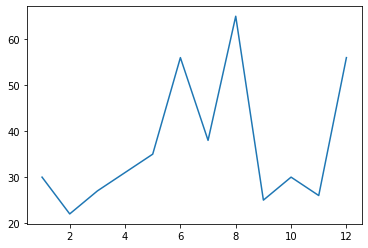

In [273]:
fig, ax = plt.subplots()
ax.plot(d1.groupby('month')['Quantity'].sum())
plt.show()

**Questão:** Considerando a receita líquida mensal de vendas em 2019. Quais os valores de: média, mediana e desvio padrão desses valores?

In [274]:
d2 = data.query("year == 2019")

In [275]:
# Adicionar ao DataFrame d2 a coluna receita
d2['receita'] = d2.apply(lambda x: x['UnitPrice']*x['Quantity'], axis=1)

<ipython-input-275-555a689e6fdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['receita'] = d2.apply(lambda x: x['UnitPrice']*x['Quantity'], axis=1)


In [276]:
d2

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,date,year,month,receita
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,2019,4,162.4
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,2019,7,194.6
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21,2019,1,406.0
5,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.2,1,1,2019-03-28,2019,3,249.2
6,b35a771164a9defa3b4767f1b66918b1,002959d7a0b0990fe2d69988affcbc803,14002,0.08,261.8,1,1,2019-08-14,2019,8,261.8
...,...,...,...,...,...,...,...,...,...,...,...
32733,0d8ac7eb8e52447e022b8e4a30ff6394,002d4ea7c04739c130bb74d7e7cd16943,28689,0.10,210.0,1,9,2019-11-23,2019,11,210.0
32739,18a83c7532fc2dc3a10fd55ff3655588,0011c512eb256aa0dbbb544d8dffcf6e1,19615,0.10,204.4,1,1,2019-02-20,2019,2,204.4
32740,d105b386fa5b4aab107c43ba2760f64b,002552c0663708129c0019cc97552d7d3,19619,0.08,249.2,1,4,2019-08-29,2019,8,249.2
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,0.08,148.4,1,4,2019-08-01,2019,8,148.4


In [277]:
d2.groupby('month')['receita'].sum().describe()

count        12.000000
mean     324240.933333
std      105678.209798
min      187203.800000
25%      265072.150000
50%      285989.900000
75%      357271.950000
max      495861.800000
Name: receita, dtype: float64

Média 324.240,93 | Mediana 285.989,90 | Desvio padrão 105.678,21

**Questão:** Ainda considerando os dados de receita líquida de vendas em 2019, seu time deve focar esforços em uma das lojas para criar análises mais profundas e a primeira versão do modelo preditivo. Qual destas lojas você escolheria para prosseguir com o projeto?

In [278]:
d2.groupby('StoreID')['receita'].sum()

StoreID
1     992059.6
2     797032.6
3     736108.8
4     617593.2
7     423572.8
9     212077.6
22    112446.6
Name: receita, dtype: float64

In [279]:
d2.groupby('StoreID')['Quantity'].sum()

StoreID
1     3928
2     3180
3     2935
4     2401
7     1673
9      851
22     444
Name: Quantity, dtype: int64

A StoreID 1 (Florianópolis) realizou a venda da maior quantidade de itens e também possui a maior receita, portanto, torna-se um forte candidato para o desenvolvimento do projeto.